# E-Mail classification NLP

<h3>The data consists of email body and labels for text classification.</h3>

1) Message body<br>
2) Labels

In [1]:
#importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#Rest of the libraries will be imported wherver necessary

In [3]:
df=pd.read_csv('D:\\M. Tech in Data Science & Machine Learning\\Natural language processing (NLP)\\Sem Preparation\\SMS_test.csv', encoding='unicode_escape')
df.head()#first 5 observations

,S. No.,Message_body,Label
0,1,"UpgrdCentre Orange customer, you may now claim...",Spam
1,2,"Loan for any purpose £500 - £75,000. Homeowner...",Spam
2,3,Congrats! Nokia 3650 video camera phone is you...,Spam
3,4,URGENT! Your Mobile number has been awarded wi...,Spam
4,5,Someone has contacted our dating service and e...,Spam


In [4]:
df.tail()#last 5 observations

,S. No.,Message_body,Label
120,121,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
121,122,Try to do something dear. You read something f...,Non-Spam
122,123,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
123,124,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam
124,125,Great. Have a safe trip. Dont panic surrender ...,Non-Spam


In [5]:
df.shape##checking total records

(125, 3)

In [6]:
#make copy of the original dataframe

In [7]:
df1=df.copy()

In [8]:
#Step1: Lowercase

In [9]:
df1.head()

,S. No.,Message_body,Label
0,1,"UpgrdCentre Orange customer, you may now claim...",Spam
1,2,"Loan for any purpose £500 - £75,000. Homeowner...",Spam
2,3,Congrats! Nokia 3650 video camera phone is you...,Spam
3,4,URGENT! Your Mobile number has been awarded wi...,Spam
4,5,Someone has contacted our dating service and e...,Spam


In [10]:
df1['New_Message_body']=df1['Message_body'].str.lower().str.replace('[^a-z\s]','')
#str.lower() : converting to lowercase (to bring all the same words in same format)
## str.replace: replace everything other than alphabets and space

In [11]:
df1.head()

,S. No.,Message_body,Label,New_Message_body
0,1,"UpgrdCentre Orange customer, you may now claim...",Spam,upgrdcentre orange customer you may now claim ...
1,2,"Loan for any purpose £500 - £75,000. Homeowner...",Spam,loan for any purpose homeowners tenants we...
2,3,Congrats! Nokia 3650 video camera phone is you...,Spam,congrats nokia video camera phone is your cal...
3,4,URGENT! Your Mobile number has been awarded wi...,Spam,urgent your mobile number has been awarded wit...
4,5,Someone has contacted our dating service and e...,Spam,someone has contacted our dating service and e...


In [12]:
#2.Tokenize

In [13]:
#In Python tokenization basically refers to splitting up a larger body of text into smaller lines, 
#words or even creating words for a non-English language

In [14]:
df1['New_Message_body']=df1['New_Message_body'].str.split(' ')###str.split(' '): to split the words on the space between them to identify each word as token
df1.head()

,S. No.,Message_body,Label,New_Message_body
0,1,"UpgrdCentre Orange customer, you may now claim...",Spam,"[upgrdcentre, orange, customer, you, may, now,..."
1,2,"Loan for any purpose £500 - £75,000. Homeowner...",Spam,"[loan, for, any, purpose, , , , homeowners, , ..."
2,3,Congrats! Nokia 3650 video camera phone is you...,Spam,"[congrats, nokia, , video, camera, phone, is, ..."
3,4,URGENT! Your Mobile number has been awarded wi...,Spam,"[urgent, your, mobile, number, has, been, awar..."
4,5,Someone has contacted our dating service and e...,Spam,"[someone, has, contacted, our, dating, service..."


In [15]:
#3. Removing Stopwords

In [16]:
#Stopwords are the English words which does not add much meaning to a sentence.

In [17]:
import nltk # natural language tool kit
#nltk.download('stopwords') 
#used to import the stopwords
#it will downlload a text file which will have stop words

In [18]:
common_stopwords=nltk.corpus.stopwords.words('english')#extracting only the english stopwords

In [19]:
print(common_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [20]:
len(common_stopwords)

179

In [21]:
def dropstop_words(text):
    return [word for word in text if word not in common_stopwords]

In [22]:
df1['New_Message_body']=df1['New_Message_body'].apply(dropstop_words)

In [23]:
df1.head()

,S. No.,Message_body,Label,New_Message_body
0,1,"UpgrdCentre Orange customer, you may now claim...",Spam,"[upgrdcentre, orange, customer, may, claim, fr..."
1,2,"Loan for any purpose £500 - £75,000. Homeowner...",Spam,"[loan, purpose, , , , homeowners, , tenants, w..."
2,3,Congrats! Nokia 3650 video camera phone is you...,Spam,"[congrats, nokia, , video, camera, phone, call..."
3,4,URGENT! Your Mobile number has been awarded wi...,Spam,"[urgent, mobile, number, awarded, , prize, gua..."
4,5,Someone has contacted our dating service and e...,Spam,"[someone, contacted, dating, service, entered,..."


In [24]:
# 4. Lemmatization

In [25]:
from nltk.stem.wordnet import WordNetLemmatizer
Lemmatizer=WordNetLemmatizer()

In [26]:
def Lemmatization(text):
    return [Lemmatizer.lemmatize(word) for word in text]

In [27]:
df1['New_Message_body']=df1['New_Message_body'].apply(Lemmatization)

In [28]:
df1.head()

,S. No.,Message_body,Label,New_Message_body
0,1,"UpgrdCentre Orange customer, you may now claim...",Spam,"[upgrdcentre, orange, customer, may, claim, fr..."
1,2,"Loan for any purpose £500 - £75,000. Homeowner...",Spam,"[loan, purpose, , , , homeowner, , tenant, wel..."
2,3,Congrats! Nokia 3650 video camera phone is you...,Spam,"[congrats, nokia, , video, camera, phone, call..."
3,4,URGENT! Your Mobile number has been awarded wi...,Spam,"[urgent, mobile, number, awarded, , prize, gua..."
4,5,Someone has contacted our dating service and e...,Spam,"[someone, contacted, dating, service, entered,..."


In [29]:
# 5 .Cleaning the text

In [30]:
df1['New_Message_body']=df1['New_Message_body'].apply(lambda x: ' '.join(x))

In [31]:
df1.head()

,S. No.,Message_body,Label,New_Message_body
0,1,"UpgrdCentre Orange customer, you may now claim...",Spam,upgrdcentre orange customer may claim free cam...
1,2,"Loan for any purpose £500 - £75,000. Homeowner...",Spam,loan purpose homeowner tenant welcome prev...
2,3,Congrats! Nokia 3650 video camera phone is you...,Spam,congrats nokia video camera phone call call ...
3,4,URGENT! Your Mobile number has been awarded wi...,Spam,urgent mobile number awarded prize guaranteed...
4,5,Someone has contacted our dating service and e...,Spam,someone contacted dating service entered phone...


In [32]:
df2=df1.iloc[:,2:]
df2.head()

,Label,New_Message_body
0,Spam,upgrdcentre orange customer may claim free cam...
1,Spam,loan purpose homeowner tenant welcome prev...
2,Spam,congrats nokia video camera phone call call ...
3,Spam,urgent mobile number awarded prize guaranteed...
4,Spam,someone contacted dating service entered phone...


In [33]:
df2['Label'].value_counts()

Spam        76
Non-Spam    49
Name: Label, dtype: int64

In [34]:
df2['Label']=df2['Label'].replace('Spam',0)
df2['Label']=df2['Label'].replace('Non-Spam',1)

In [35]:
df2['Label'].value_counts()

0    76
1    49
Name: Label, dtype: int64

In [36]:
#Vectorizing

In [37]:
from sklearn.feature_extraction.text import CountVectorizer 

In [38]:
cv = CountVectorizer(max_features=1500, analyzer='word', lowercase=False) 

In [39]:
X = cv.fit_transform(df2['New_Message_body'])

In [40]:
Y=df2['Label']

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x_tain,x_test,y_train,y_test=train_test_split(X, Y, test_size=0.3, random_state=42)

In [43]:
#1. Decision Tree Classifier

In [44]:
from sklearn.tree import DecisionTreeClassifier
# instantiate the 'DecisionTreeClassifier' object using 'entropy' criterion
# pass the 'random_state' to obtain the same samples for each time you run the code
decision_tree_classification = DecisionTreeClassifier(max_depth = 4, criterion = 'gini', random_state = 10)

# fit the model using fit() on train data
decision_tree = decision_tree_classification.fit(x_tain,y_train)

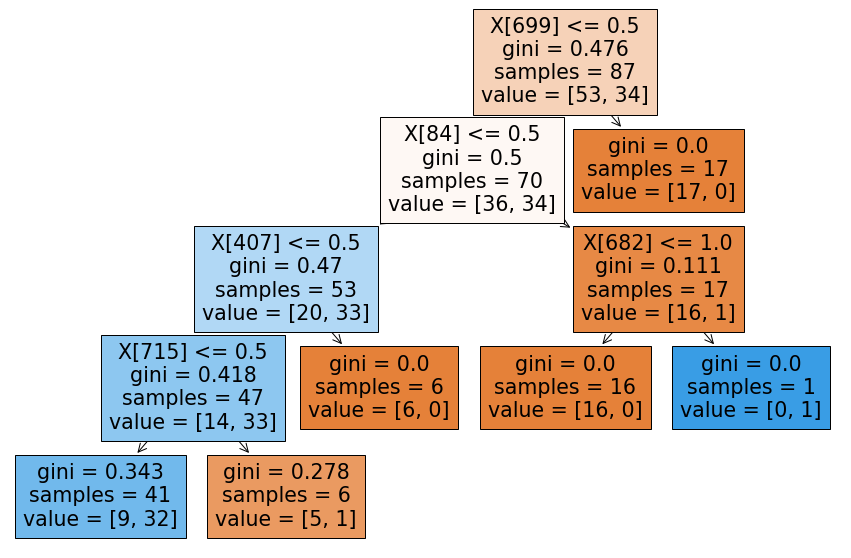

In [45]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(decision_tree,filled=True)
plt.show()

In [46]:
# apply the model on unseen testing data
dt_preds = decision_tree_classification.predict(x_test)
from sklearn import metrics
print("Accuracy of Decision Tree Classifier:", metrics.accuracy_score(y_test, dt_preds))

Accuracy of Decision Tree Classifier: 0.7368421052631579


In [47]:
from sklearn.metrics import classification_report
# compute the performance measures on test data
# call the function 'get_test_report'
test_report_dt = classification_report(y_test, dt_preds)
# print the performace measures
print(test_report_dt)

              precision    recall  f1-score   support

           0       0.93      0.61      0.74        23
           1       0.61      0.93      0.74        15

    accuracy                           0.74        38
   macro avg       0.77      0.77      0.74        38
weighted avg       0.81      0.74      0.74        38



In [48]:
#2. Random Forest Classifier

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
Random_Forest_Classifier=RandomForestClassifier()
# fit the model using fit() on train data
Random_Forest = Random_Forest_Classifier.fit(x_tain,y_train)

In [51]:
# apply the model on unseen testing data
Rf_preds = Random_Forest_Classifier.predict(x_test)
from sklearn import metrics
print("Accuracy of Random Forest Classifier:", metrics.accuracy_score(y_test, Rf_preds))

Accuracy of Random Forest Classifier: 0.8947368421052632


In [52]:
from sklearn.metrics import classification_report
# compute the performance measures on test data
# call the function 'get_test_report'
test_report_rf = classification_report(y_test, Rf_preds)
# print the performace measures
print(test_report_rf)

              precision    recall  f1-score   support

           0       0.95      0.87      0.91        23
           1       0.82      0.93      0.87        15

    accuracy                           0.89        38
   macro avg       0.89      0.90      0.89        38
weighted avg       0.90      0.89      0.90        38



In [53]:
#---------------------------------------------------------END-------------------------------------------------#